In [619]:
import pandas as pd
df = pd.read_csv("./owid-covid-data.csv")
#Trasformo in interi i total_cases ,new_cases e in datetime la colonna Date
df['total_cases'] = df['total_cases'].fillna(0).astype(int)
df['new_cases'] = df['new_cases'].fillna(0).astype(int)
df['date'] = pd.to_datetime(df['date'])

In [620]:
#Task 1 Si richiede di verificare le dimensioni del dataset e i relativi metadati;
print('La grandezza del dataset è:', df.shape )
print('')
print('I metadati del dataset sono con aggiunta di informazioni extra :')
print(df.info())


La grandezza del dataset è: (429435, 67)

I metadati del dataset sono con aggiunta di informazioni extra :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    429435 non-null  object        
 1   continent                                   402910 non-null  object        
 2   location                                    429435 non-null  object        
 3   date                                        429435 non-null  datetime64[ns]
 4   total_cases                                 429435 non-null  int32         
 5   new_cases                                   429435 non-null  int32         
 6   new_cases_smoothed                          408929 non-null  float64       
 7   total_deaths                                4118

          location  total_cases
12            Asia  301499099.0
71          Europe  252916868.0
163  North America  124492666.0
212  South America   68809418.0
170        Oceania   15003352.0
1           Africa   13145380.0


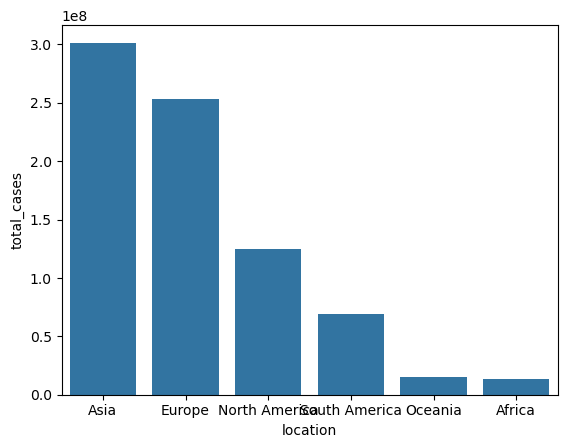

In [621]:
#Task 2 :Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; 
#si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

Continenti = ['Europe', 'Asia', 'Oceania', 'North America', 'South America', 'Africa']
Filtrati_df = df1[df1['location'].isin(Continenti)]
Total_Case_Continenti = filtered_df.sort_values('total_cases', ascending=False)
sns.barplot(x='location', y='total_cases', data=Total_Case_Continenti,)
print(Total_Case_Continenti)
#  Ero partito con un gruopby di continent, poi quando ho cercato di fare la somma dei totali ho scoperto che nella colonna Location ci sono i dati per singolo continente
# e ho preferito richiamare direttamente i valori

In [622]:
#Task 3 Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, 
#ne confronti i seguenti relativi descrittori statistici: valore massimo, media, 
#e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

#Per questa analisi scelgo Europa e Asia

#Calcolo i casi totali basandomi sulla somma dei continenti , all'interno di location sono presenti anche i subtotali dei continenti e indicazioni di 
# raggruppamento di aree geografiche come Unione Europea che sporcherebbero la somma con dati ripetuti.
Casi_totali = Total_Case_Continenti.total_cases.sum()
# il valore è 775866783  confrontato con altri db presenti in rete https://coronavirus.gimbe.org/epidemia-coronavirus-europa.it-IT.html

#calcolo la media per i casi totali di ogni stato dei continenti e li inserisco in due variabili
Media_Asia = df[df['continent'] == 'Asia'].groupby('location')['total_cases'].max().mean()
Media_Europa = df[df['continent'] == 'Europe'].groupby('location')['total_cases'].max().mean()

#creo due variabili con i dati massimi per i continenti analizzati 
Max_Asia = Filtrati_df[Filtrati_df['location'] == 'Asia']['total_cases'].max()
Max_Europa = Filtrati_df[Filtrati_df['location'] == 'Europe']['total_cases'].max()

#calcolo percentuale su casi totali
Asia_Perc = (Max_Asia/Casi_totali) *100
Europa_Perc = (Max_Europa/Casi_totali) *100

print('Per i continenti Asia e Europa analizziamo i Casi totali')
print('')
print('Per Asia il numero medio di casi totali per ogni suo stato è :',Media_Asia.round(2), 'il numero massimo di casi è : ',Max_Asia, 'la percentuale rispetto al totale è :' ,Asia_Perc.round(2),'%' )
print('')
print('Per Europa il numero medio di casi totali per ogni suo stato è :',Media_Europa.round(2), 'il numero massimo di casi è : ',Max_Europa, 'la percentuale rispetto al totale è :' ,Europa_Perc.round(2),'%' )

Per i continenti Asia e Europa analizziamo i Casi totali

Per Asia il numero medio di casi totali per ogni suo stato è : 5912398.96 il numero massimo di casi è :  301499099.0 la percentuale rispetto al totale è : 38.86 %

Per Europa il numero medio di casi totali per ogni suo stato è : 4598488.51 il numero massimo di casi è :  252916868.0 la percentuale rispetto al totale è : 32.6 %


C:\Users\Feronia\AppData\Local\Temp\ipykernel_9344\204623384.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Filtro_Italia_2022['casi_cumulativi'] = Filtro_Italia_2022['new_cases'].cumsum()


<Axes: title={'center': '4-Confronto tra casi totali e casi cumulativi in Italia nel 2022'}, xlabel='date'>

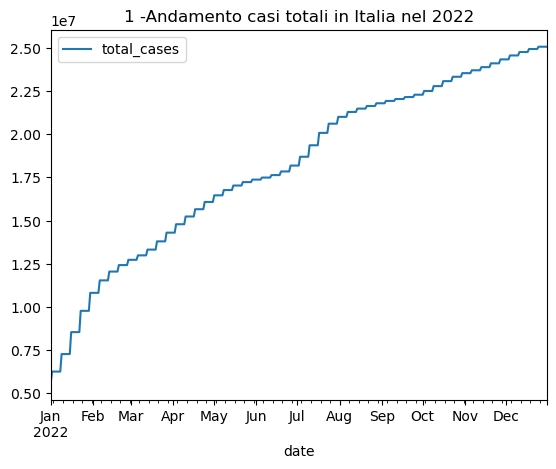

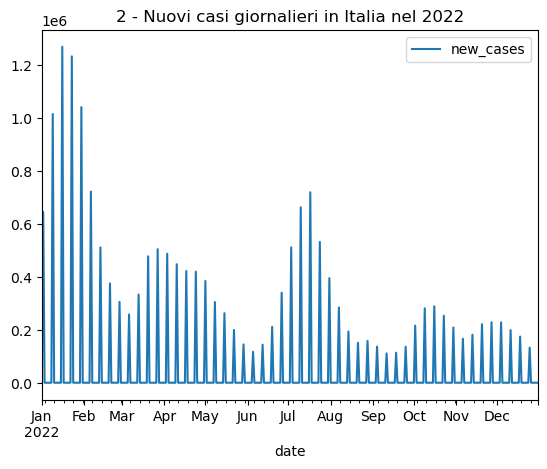

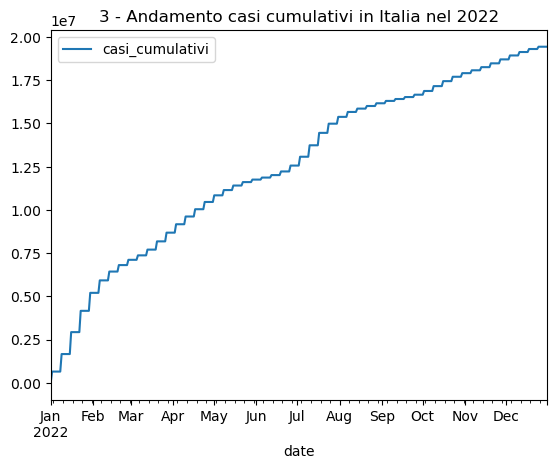

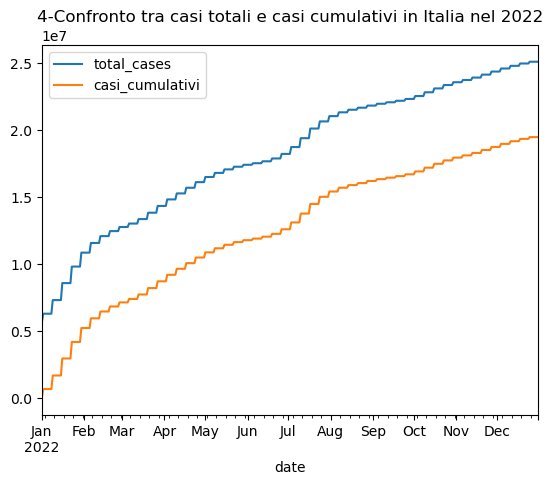

In [623]:
##task 4 Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. 
#Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). 
#Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, 
#e commentare se ci sono similarità con l'andamento del numero dei casi totali;

#Filtraggio dati Italia 2022
Filtro_Italia_2022 = df.loc[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]


#1 grafico relativo ai casi totali 
Filtro_Italia_2022.plot(x ='date', y = 'total_cases', title ='1 -Andamento casi totali in Italia nel 2022')

#2 grafico relativo ai nuovi casi 
Filtro_Italia_2022.plot(kind = 'line',x ='date', y = 'new_cases',title ='2 - Nuovi casi giornalieri in Italia nel 2022' )

# 3 grafico relativo ai casi cumulativi - aggiunto nuovo dato con i dati cumulativi per l'anno 2022
Filtro_Italia_2022['casi_cumulativi'] = Filtro_Italia_2022['new_cases'].cumsum()
Filtro_Italia_2022.plot(x='date', y='casi_cumulativi', title='3 - Andamento casi cumulativi in Italia nel 2022')

#4 Confronto tra casi totali e casi cumulativi - I casi cumulativi rispecchiano i total case escludendo i dati precedenti alla data filtrata.
Filtro_Italia_2022.plot(x='date', y=['total_cases', 'casi_cumulativi'], title='4-Confronto tra casi totali e casi cumulativi in Italia nel 2022')


<Axes: xlabel='location', ylabel='icu_patients'>

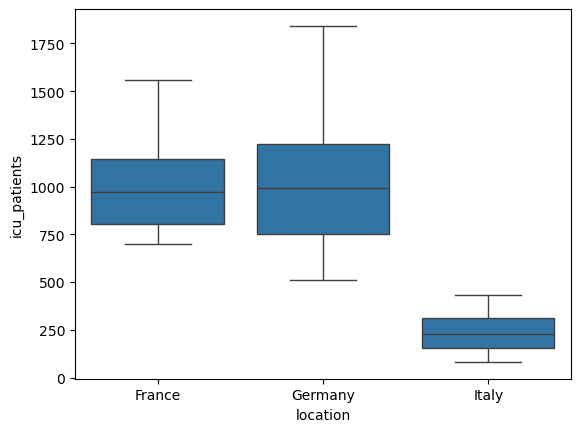

In [624]:
#Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo 
#il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso),
#e scrivere un breve commento a riguardo;


filtro_periodo = (df['date'] >= '2022-05-01') & (df['date'] <= '2023-04-30')
filtro_nazioni = df['location'].isin(['Italy', 'Germany', 'France'])
df_filtrato = df.loc[filtro_periodo & filtro_nazioni]
sns.boxplot(x='location', y='icu_patients', data=df_filtrato,)
# da questo grafico è possibile evidenziare che molto probabilmente come prima ipotesi  rispetto alla altre nazioni europee l'italia ha un numero inferiore di disponibilità
#di posti letto in terapia intesiva, considerato che il baffo massimo di italia non corrisponde al minimo delle altre nazioni, potrebbe inoltre significare
#approcci medici diversi, oppure che la copertura vaccinale potrebbe essere stata più efficace. 

In [637]:
#Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna 
#-- se ci sono dati nulli, suggerire se può essere possibile gestirle tramite sostituzione o meno
nazioni_di_interesse = ['Italy', 'Germany', 'France', 'Spain']
df_filtrato = df[(df['location'].isin(nazioni_di_interesse)) & (df['date'].dt.year == 2023)]
valorinulli = df_filtrato['hosp_patients'].isnull().sum()
somma_pazienti = df_filtrato.groupby('location')['hosp_patients'].sum()
print("Somma dei pazienti ospedalizzati per nazione:")
print(somma_pazienti)
print(f"\nNumero di valori nulli nella colonna 'hosp_patients': {valorinulli}")
valori_nulli_per_nazione = df_filtrato.groupby('location')['hosp_patients'].apply(lambda x: x.isnull().sum())
print("\nNumero di valori nulli per ciascuna nazione:")
print(valori_nulli_per_nazione)


#il dato per germania è sempre null, potremmo sostituire i dati con la mediana del periodo storico precedente ma non sarebbe corretto poiché le varibili 
#come Vaccinati e contagiati sono diverse, sarebbe il caso di trovare un dataset esterno e integrare i dati , 
#anche spagna e francia hanno dati nulli, ma dato il numero di pazienti ospitalizzati in francia questo potrebbe essere dovuto solamente a un cambiamento 
#della frequenza con cui vengono oggiornati i dati, per la spagna si dovrebbe analizzare la distrubuzione dei dati nell'arco temporale e capire se c'è stato un stop
#registrazione del dato

Somma dei pazienti ospedalizzati per nazione:
location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

Numero di valori nulli nella colonna 'hosp_patients': 843

Numero di valori nulli per ciascuna nazione:
location
France     275
Germany    365
Italy        0
Spain      203
Name: hosp_patients, dtype: int64
